### Dataset

In [1]:
#banknotes.csv
#loaction: https://mitu.co.in/dataset

### Import the Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [23]:
df= pd.read_csv('banknotes.csv')

In [24]:
df.shape

(1372, 5)

In [25]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [27]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

### Separate the input and output variables

In [28]:
#input data
X=df.drop('Class', axis=1)

#output data
y=df['Class']

### Explor the data

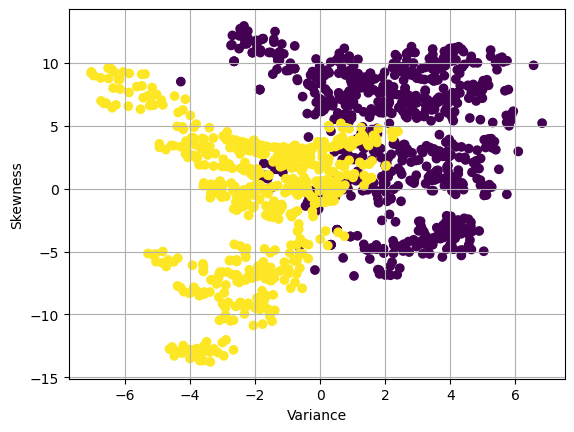

In [33]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.grid()
plt.scatter(df['Variance'], df['Skewness'], c=y)


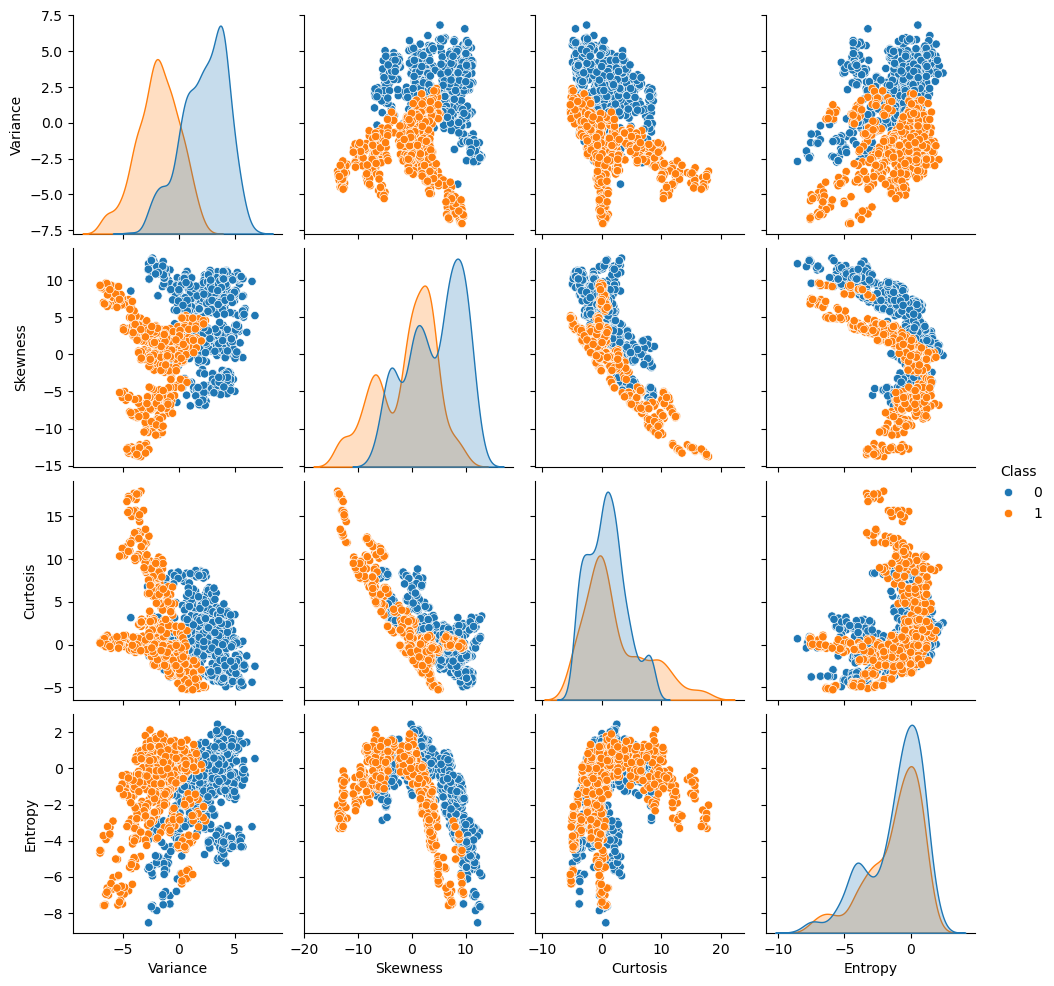

In [34]:
sns.pairplot(df, hue='Class')

In [36]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x279e0a0bb50>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

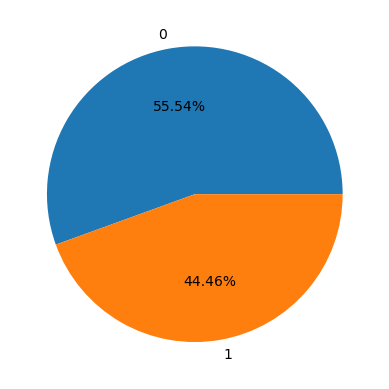

In [37]:
plt.pie(y.value_counts(), labels= y.value_counts().index, autopct='%2.2f%%')

In [38]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Cross Validation

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [41]:
x_train.shape

(1029, 4)

In [42]:
x_test.shape

(343, 4)

### Build the model

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt= DecisionTreeClassifier(random_state=0)

In [45]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Performance Evaluation

In [47]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
y_pred= dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9795918367346939


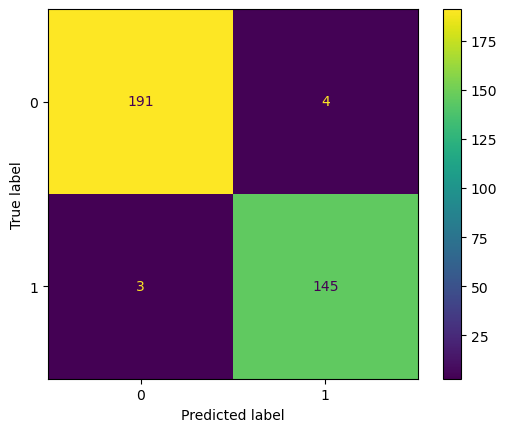

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



### Feature Importances

<BarContainer object of 4 artists>

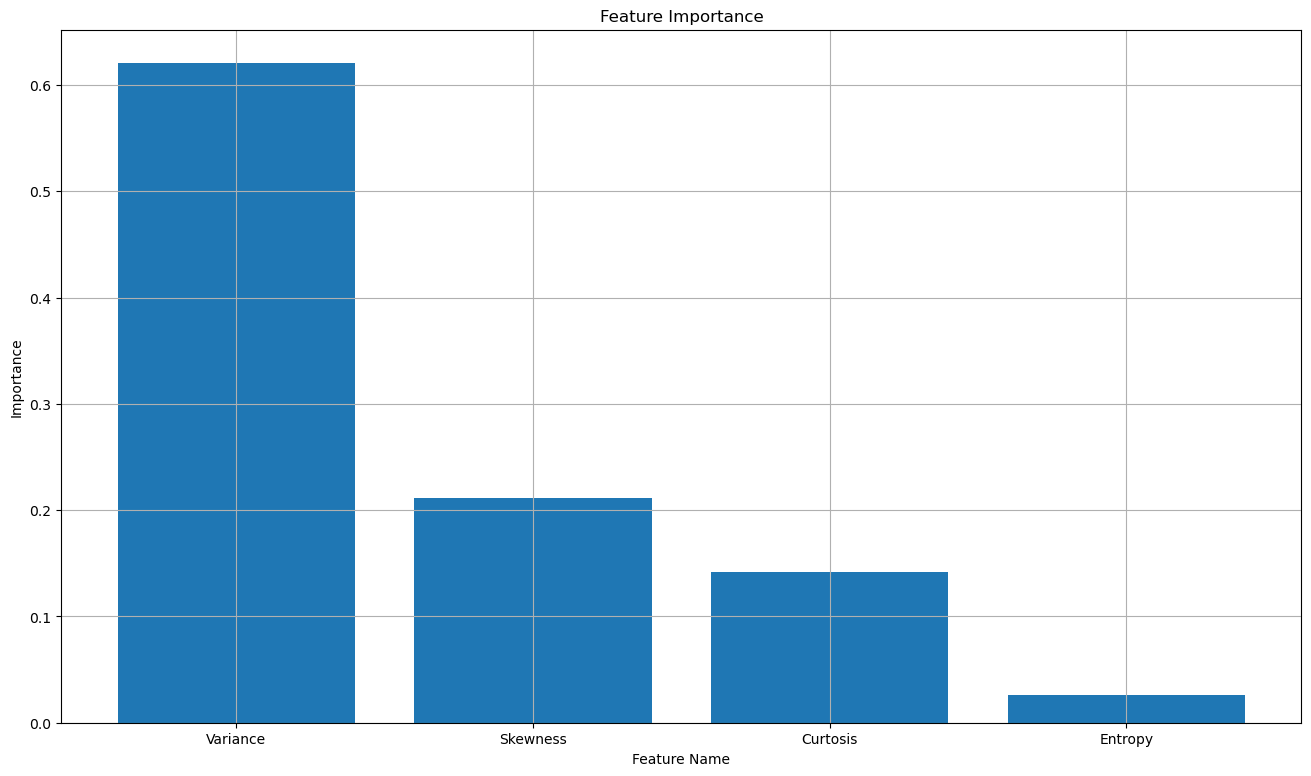

In [53]:
plt.figure(figsize=(16,9))
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(X.columns, dt.feature_importances_)

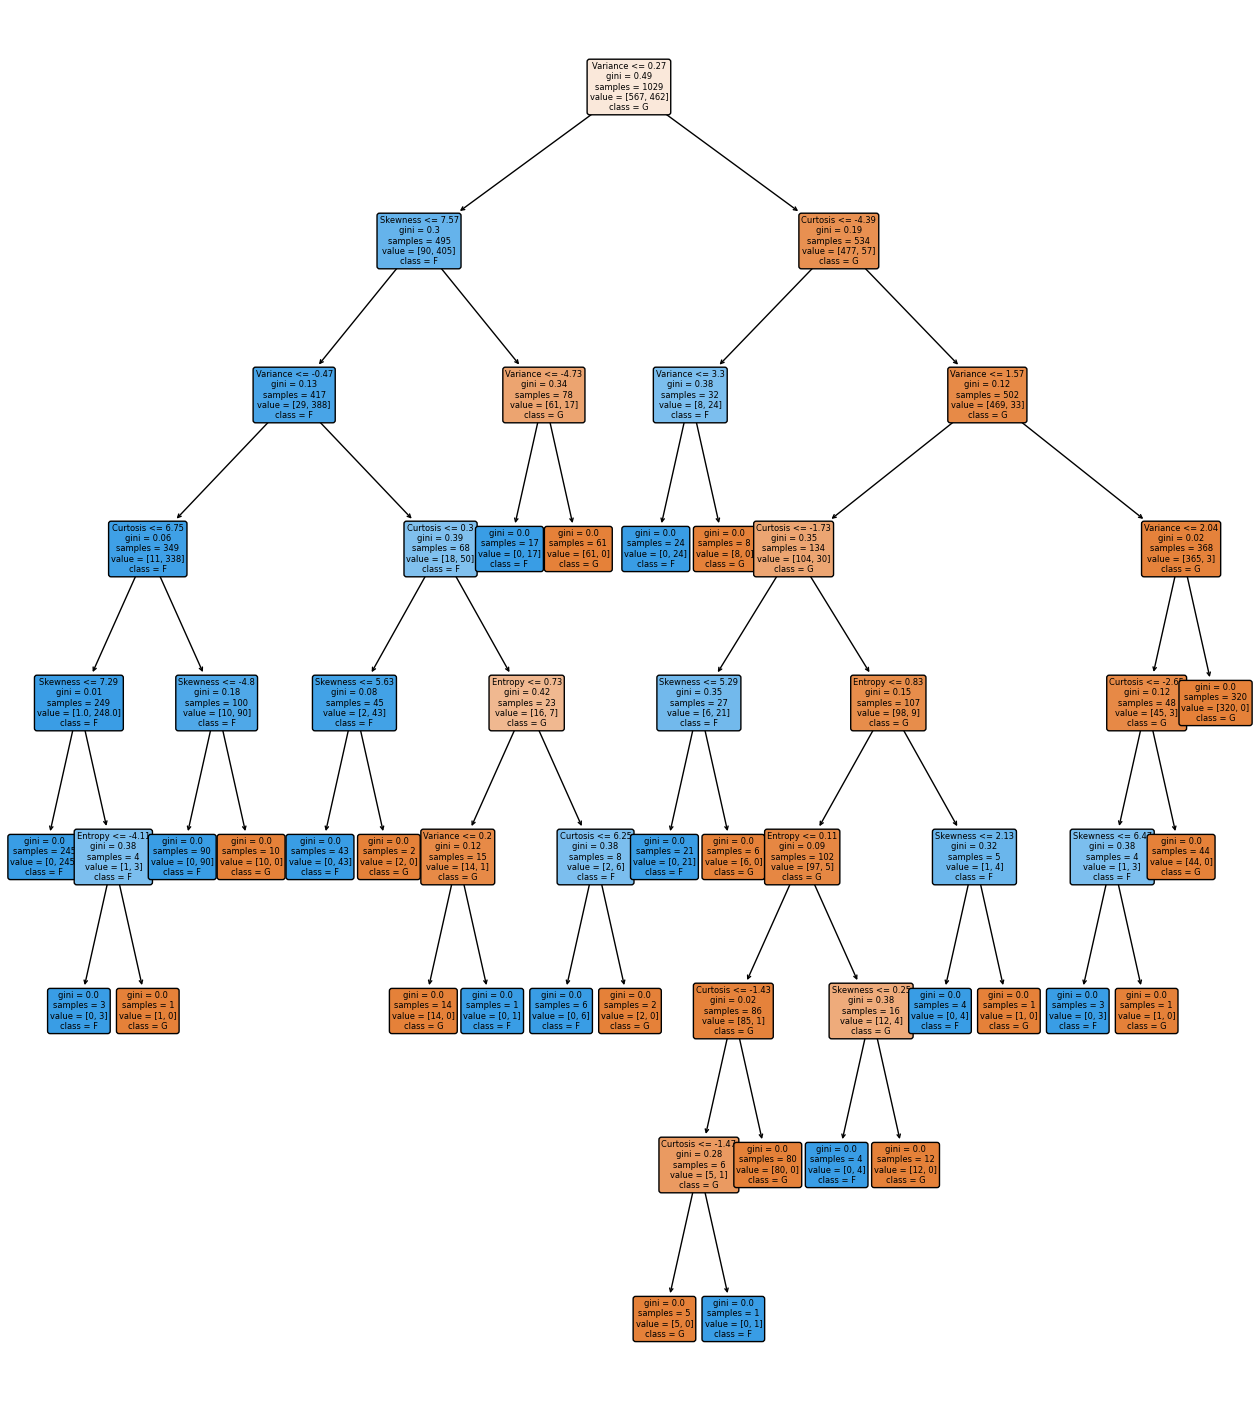

In [60]:
from sklearn.tree import plot_tree


plt.figure(figsize=(16,18))
plot_tree(dt,fontsize=6, feature_names=list(X.columns),
          class_names=['G','F'],
          filled=True,rounded=True, precision=2)
plt.show()

### Prediction

In [63]:
#Predict which node is fake and which is real
new= pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],
                  [3.45660, 9.52280, -4.0112, -3.59440],
                  [4.54590, 8.16740, -2.4586, -1.46210]], columns=X.columns)

In [64]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [65]:
dt.predict(new)

array([1, 0, 0], dtype=int64)

### Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf= RandomForestClassifier(random_state=0, n_estimators=10)

In [68]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [69]:
y_pred=rf.predict(x_test)

In [70]:
print(accuracy_score(y_test, y_pred))

0.9941690962099126


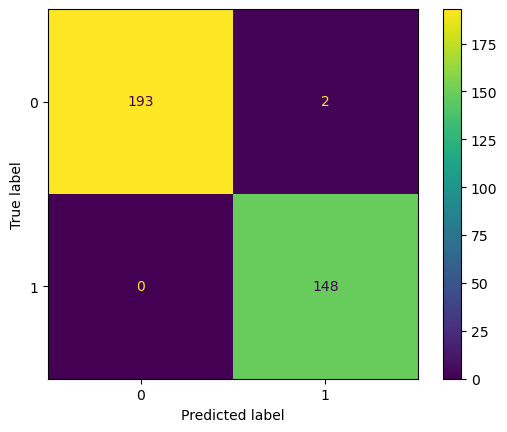

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

